## Load Data from CSVs

In [1]:
import unicodecsv

## Longer version of code (replaced with shorter, equivalent version below)

# enrollments = []
# f = open('enrollments.csv', 'rb')
# reader = unicodecsv.DictReader(f)
# for row in reader:
#     enrollments.append(row)
# f.close()
enrollments_filename = 'C:/Users/Hridoy Alam/Desktop/Udacity/Into Data Analysis/enrollments.csv'

with open(enrollments_filename, 'rb') as f:
    reader = unicodecsv.DictReader(f)
    enrollments = list(reader)
    
print(enrollments[0])


OrderedDict([('account_key', '448'), ('status', 'canceled'), ('join_date', '2014-11-10'), ('cancel_date', '2015-01-14'), ('days_to_cancel', '65'), ('is_udacity', 'True'), ('is_canceled', 'True')])


In [2]:
def read_csv(filename):
    with open (filename, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)

In [3]:
#####################################
#                 1                 #
#####################################

## Read in the data from daily_engagement.csv and project_submissions.csv 
## and store the results in the below variables.
## Then look at the first row of each table.
engagement_filename = 'C:/Users/Hridoy Alam/Desktop/Udacity/Into Data Analysis/daily_engagement.csv'
submissions_filename = 'C:/Users/Hridoy Alam/Desktop/Udacity/Into Data Analysis/project_submissions.csv'

daily_engagement = read_csv(engagement_filename)
project_submissions = read_csv(submissions_filename)

print(daily_engagement[0])
print(project_submissions[0])

OrderedDict([('acct', '0'), ('utc_date', '2015-01-09'), ('num_courses_visited', '1.0'), ('total_minutes_visited', '11.6793745'), ('lessons_completed', '0.0'), ('projects_completed', '0.0')])
OrderedDict([('creation_date', '2015-01-14'), ('completion_date', '2015-01-16'), ('assigned_rating', 'UNGRADED'), ('account_key', '256'), ('lesson_key', '3176718735'), ('processing_state', 'EVALUATED')])


In [4]:
print(len(project_submissions))

3642


## Fixing Data Types

In [5]:
from datetime import datetime as dt

# Takes a date as a string, and returns a Python datetime object. 
# If there is no date given, returns None
def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%Y-%m-%d')
    
# Takes a string which is either an empty string or represents an integer,
# and returns an int or None.
def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)

# Clean up the data types in the enrollments table
for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    
enrollments[0]

OrderedDict([('account_key', '448'),
             ('status', 'canceled'),
             ('join_date', datetime.datetime(2014, 11, 10, 0, 0)),
             ('cancel_date', datetime.datetime(2015, 1, 14, 0, 0)),
             ('days_to_cancel', 65),
             ('is_udacity', True),
             ('is_canceled', True)])

In [6]:
# Clean up the data types in the engagement table
for engagement_record in daily_engagement:
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])
    
daily_engagement[0]

OrderedDict([('acct', '0'),
             ('utc_date', datetime.datetime(2015, 1, 9, 0, 0)),
             ('num_courses_visited', 1),
             ('total_minutes_visited', 11.6793745),
             ('lessons_completed', 0),
             ('projects_completed', 0)])

In [7]:
# Clean up the data types in the submissions table
for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])

project_submissions[0]

OrderedDict([('creation_date', datetime.datetime(2015, 1, 14, 0, 0)),
             ('completion_date', datetime.datetime(2015, 1, 16, 0, 0)),
             ('assigned_rating', 'UNGRADED'),
             ('account_key', '256'),
             ('lesson_key', '3176718735'),
             ('processing_state', 'EVALUATED')])

## Investigating the Data

In [8]:
#####################################
#                 2                 #
#####################################
enrollment_num_rows = len(enrollments)
print(enrollment_num_rows)
engagement_num_rows = len(daily_engagement)
print(engagement_num_rows)
submission_num_rows = len(project_submissions)
print(submission_num_rows)
## Find the total number of rows and the number of unique students (account keys)
## in each table.

1640
136240
3642


## solution

In [9]:

    
### For each of these three tables, find the number of rows in the table and
### the number of unique students in the table. To find the number of unique
### students, you might want to create a set of the account keys in each table.

#enrollment_num_rows = len(enrollments)            # Replace this with your code
enrollment_num_unique_students = 0
enroll = set()
# Replace this with your code

#engagement_num_rows = len(daily_engagement)            # Replace this with your code
engagement_num_unique_students = 0
engagement_unique_students = set()  # Replace this with your code

#submission_num_rows = len(project_submissions)           # Replace this with your code
submission_num_unique_students = 0
submi = set()  # Replace this with your code

enrollment_num_rows = len(enrollments)
print(enrollment_num_rows)


for en in enrollments:
    enroll.add(en['account_key'])

enrollment_num_unique_students=len(enroll)

print(enrollment_num_unique_students)

engagement_num_rows = len(daily_engagement)
print(engagement_num_rows)

for dg in daily_engagement:
    engagement_unique_students.add(dg['acct'])

engagement_num_unique_students = len(engagement_unique_students)   
print(engagement_num_unique_students)

submission_num_rows = len(project_submissions)
print(submission_num_rows)


for sb in project_submissions:
    submi.add(sb['account_key'])

submission_num_unique_students = len(submi)
print(submission_num_unique_students)


1640
1302
136240
1237
3642
743


## Problems in the Data

In [10]:
#####################################
#                 3                 #
#####################################

## Rename the "acct" column in the daily_engagement table to "account_key".

for engagement_record in daily_engagement:
    engagement_record['account_key'] = engagement_record['acct']
    del [engagement_record['acct']]



In [11]:
daily_engagement[0]['account_key']

'0'

## Missing Engagement Records

In [12]:
#####################################
#                 4                 #
#####################################

## Find any one student enrollments where the student is missing from the daily engagement table.
## Output that enrollment.
cnt = 0
l = 0
for enrollment in enrollments:
    student = enrollment['account_key']
    if student not in engagement_unique_students:
        print (enrollment)
        cnt +=1
        l = len(enrollment)
        break

OrderedDict([('account_key', '1219'), ('status', 'canceled'), ('join_date', datetime.datetime(2014, 11, 12, 0, 0)), ('cancel_date', datetime.datetime(2014, 11, 12, 0, 0)), ('days_to_cancel', 0), ('is_udacity', False), ('is_canceled', True)])


In [13]:
print(l)

7


## Checking for More Problem Records

In [14]:
num_problem_students = 0

for enrollment in enrollments:
    student = enrollment['account_key']
    if student not in engagement_unique_students  and enrollment['join_date'] != enrollment['cancel_date']:
        num_problem_students += 1
    
num_problem_students

3

In [15]:
#####################################
#                 5                 #
#####################################

## Find the number of surprising data points (enrollments missing from
## the engagement table) that remain, if any.

## Tracking Down the Remaining Problems

In [23]:
# Create a set of the account keys for all Udacity test accounts
udacity_test_accounts = set()
for enrollment in enrollments:
    if enrollment['is_udacity']:
        udacity_test_accounts.add(enrollment['account_key'])
len(udacity_test_accounts)

6

In [29]:
print(udacity_test_accounts)

{'448', '1069', '1304', '1101', '818', '312'}


In [25]:
# Given some data with an account_key field, removes any records corresponding to Udacity test accounts
def remove_udacity_accounts(data):
    non_udacity_data = []
    for data_point in data:
        if data_point['account_key'] not in udacity_test_accounts:
            non_udacity_data.append(data_point)
    return non_udacity_data


ok


In [77]:
# Remove Udacity test accounts from all three tables
non_udacity_enrollments = remove_udacity_accounts(enrollments)
non_udacity_engagement = remove_udacity_accounts(daily_engagement)
non_udacity_submissions = remove_udacity_accounts(project_submissions)

print(len(non_udacity_enrollments))
print(len(non_udacity_engagement))
print(len(non_udacity_submissions))

1622
135656
3634


In [78]:
print(non_udacity_enrollments)


[OrderedDict([('account_key', '700'), ('status', 'canceled'), ('join_date', datetime.datetime(2014, 11, 10, 0, 0)), ('cancel_date', datetime.datetime(2014, 11, 16, 0, 0)), ('days_to_cancel', 6), ('is_udacity', False), ('is_canceled', True)]), OrderedDict([('account_key', '429'), ('status', 'canceled'), ('join_date', datetime.datetime(2014, 11, 10, 0, 0)), ('cancel_date', datetime.datetime(2015, 3, 10, 0, 0)), ('days_to_cancel', 120), ('is_udacity', False), ('is_canceled', True)]), OrderedDict([('account_key', '429'), ('status', 'canceled'), ('join_date', datetime.datetime(2015, 3, 10, 0, 0)), ('cancel_date', datetime.datetime(2015, 6, 17, 0, 0)), ('days_to_cancel', 99), ('is_udacity', False), ('is_canceled', True)]), OrderedDict([('account_key', '60'), ('status', 'canceled'), ('join_date', datetime.datetime(2014, 11, 10, 0, 0)), ('cancel_date', datetime.datetime(2015, 1, 14, 0, 0)), ('days_to_cancel', 65), ('is_udacity', False), ('is_canceled', True)]), OrderedDict([('account_key', '60

## Refining the Question

In [79]:
#####################################
#                 6                 #
#####################################

## Create a dictionary named paid_students containing all students who either
## haven't canceled yet or who remained enrolled for more than 7 days. The keys
## should be account keys, and the values should be the date the student enrolled.

paid_students = {}

for enrollment in non_udacity_enrollments:
    if not enrollment['is_canceled'] or enrollment['days_to_cancel'] > 7:
        account_key =  enrollment['account_key']
        enrollment_date = enrollment['join_date']
        
        if account_key not in paid_students or enrollment_date > paid_students[account_key]:
            paid_students[account_key] = enrollment_date
len(paid_students)

995

## Getting Data from First Week

In [118]:
# Takes a student's join date and the date of a specific engagement record,
# and returns True if that engagement record happened within one week
# of the student joining.
def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days < 7 and time_delta.days >= 0


In [119]:
def remove_free_trial_cancels(data):
    new_data = []
    for data_point in data:
        if data_point['account_key'] in paid_students:
            new_data.append(data_point)
    return new_data

In [120]:
print(len(non_udacity_enrollments))

1622


In [142]:
paid_enrollments = remove_free_trial_cancels(non_udacity_enrollments)
paid_engagements = remove_free_trial_cancels(non_udacity_engagement)
paid_submission = remove_free_trial_cancels(non_udacity_submissions)

print(len(paid_enrollments))
print(len(paid_engagements))
print(len(paid_submission))

1293
134549
3618


In [122]:
#####################################
#                 7                 #
#####################################

## Create a list of rows from the engagement table including only rows where
## the student is one of the paid students you just found, and the date is within
## one week of the student's join date.

paid_engagement_in_first_week = []

for engagement_record in paid_engagements:
    account_key = engagement_record['account_key']
    join_date = paid_students[account_key]
    engagement_record_date = engagement_record['utc_date']
    
    if within_one_week(join_date, engagement_record_date):
        paid_engagement_in_first_week.append(engagement_record)
len(paid_engagement_in_first_week)

6919

## Exploring Student Engagement

In [123]:
from collections import defaultdict

# Create a dictionary of engagement grouped by student.
# The keys are account keys, and the values are lists of engagement records.
engagement_by_account = defaultdict(list)
for engagement_record in paid_engagement_in_first_week:
    account_key = engagement_record['account_key']
    engagement_by_account[account_key].append(engagement_record)

In [124]:
# Create a dictionary with the total minutes each student spent in the classroom during the first week.
# The keys are account keys, and the values are numbers (total minutes)
total_minutes_by_account = {}
for account_key, engagement_for_student in engagement_by_account.items():
    total_minutes = 0
    for engagement_record in engagement_for_student:
        total_minutes += engagement_record['total_minutes_visited']
    total_minutes_by_account[account_key] = total_minutes

In [125]:
total_minutes = list(total_minutes_by_account.values())
print(total_minutes)

[494.88049616599994, 18.576384666670002, 0.0, 0.0, 33.3214046667, 329.7578566663, 780.4545511666701, 104.20388850009999, 989.113641833, 448.471384167, 130.12347833367, 0.0, 179.4719088333, 1013.3833969996999, 65.6221875, 983.375040335, 119.12030049999998, 235.49969150033, 155.1361575, 0.0, 447.93897783336996, 931.1036911666699, 657.2052335000001, 1591.3228143334, 943.188117167, 0.0, 430.801675833, 1579.12122666663, 766.256315667, 556.1906033333, 69.6578351667, 0.0, 123.2915048333, 253.9870258334, 180.413814, 765.6402170004, 809.2138958339, 1378.195091668, 0.0, 1001.5888595, 478.21952616690004, 511.925391, 576.4643026663, 88.822038, 0.0, 0.0, 26.1189351667, 854.8288881656, 1055.6871896667, 0.0, 491.9087078335, 0.0, 3.22752383333, 401.97479050029995, 427.764673834, 589.6171318323301, 106.72208133333001, 91.3514995, 1024.109326834, 47.1679638333, 0.0, 496.99219366667, 293.383122167, 465.58233333400005, 346.5030268336, 422.27366000010005, 6.95969283333, 856.8375048337, 0.0, 0.0, 310.042414

In [126]:
import numpy as np

# Summarize the data about minutes spent in the classroom
#total_minutes = total_minutes_by_account.values()
me =  np.mean(total_minutes)
print(me)
#print ('Mean:', np.mean(total_minutes))
print ('Standard deviation:', np.std(total_minutes))
print ('Minimum:', np.min(total_minutes))
print ('Maximum:', np.max(total_minutes))

306.70832675342825
Standard deviation: 412.99693340852957
Minimum: 0.0
Maximum: 3564.7332644989997


## Debugging Data Analysis Code

In [130]:
#####################################
#                 8                 #
#####################################

## Go through a similar process as before to see if there is a problem.
## Locate at least one surprising piece of data, output it, and take a look at it.
students_with_max_minutes = None
max_minutes = 0

for student, total_minutes in total_minutes_by_account.items():
    if total_minutes > max_minutes:
        max_minutes = total_minutes
        student_with_max_minutes = student
print(max_minutes)

3564.7332644989997


In [132]:
for engagement_record in paid_engagement_in_first_week:
    if engagement_record['account_key'] == student_with_max_minutes:
        print(engagement_record)

OrderedDict([('utc_date', datetime.datetime(2015, 7, 9, 0, 0)), ('num_courses_visited', 4), ('total_minutes_visited', 850.519339666), ('lessons_completed', 4), ('projects_completed', 0), ('account_key', '163')])
OrderedDict([('utc_date', datetime.datetime(2015, 7, 10, 0, 0)), ('num_courses_visited', 6), ('total_minutes_visited', 872.633923334), ('lessons_completed', 6), ('projects_completed', 0), ('account_key', '163')])
OrderedDict([('utc_date', datetime.datetime(2015, 7, 11, 0, 0)), ('num_courses_visited', 2), ('total_minutes_visited', 777.018903666), ('lessons_completed', 6), ('projects_completed', 0), ('account_key', '163')])
OrderedDict([('utc_date', datetime.datetime(2015, 7, 12, 0, 0)), ('num_courses_visited', 1), ('total_minutes_visited', 294.568774), ('lessons_completed', 2), ('projects_completed', 0), ('account_key', '163')])
OrderedDict([('utc_date', datetime.datetime(2015, 7, 13, 0, 0)), ('num_courses_visited', 3), ('total_minutes_visited', 471.2139785), ('lessons_completed

## Lessons Completed in First Week

In [135]:
#####################################
#                 9                 #
#####################################

## Adapt the code above to find the mean, standard deviation, minimum, and maximum for
## the number of lessons completed by each student during the first week. Try creating
## one or more functions to re-use the code above.

def calculate(data):
    print(np.mean(data))
    print ('Standard deviation:', np.std(data))
    print ('Minimum:', np.min(data))
    print ('Maximum:', np.max(data))
    



In [136]:
print(total_minutes)

9.771473833329999


## Number of Visits in First Week

Populating the interactive namespace from numpy and matplotlib
Mean: 306.70832675342825
Standard deviation: 412.99693340852957
Minimum: 0.0
Maximum: 3564.7332644989997


C:\Users\Hridoy Alam\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


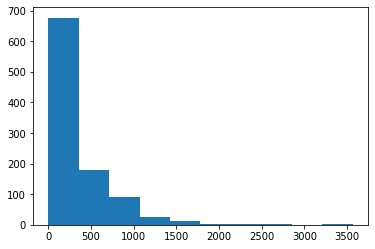

In [151]:
######################################
#                 10                 #
######################################

## Find the mean, standard deviation, minimum, and maximum for the number of
## days each student visits the classroom during the first week.

from collections import defaultdict

def group_data(data, key_name):
    grouped_data = defaultdict(list)
    for data_point in data:
        key = data_point[key_name]
        grouped_data[key].append(data_point)
    return grouped_data

engagement_by_account = group_data(paid_engagement_in_first_week, 'account_key')

def sum_grouped_items(grouped_data, field_name):
    summed_data = {}
    for key, data_points in grouped_data.items():
        total = 0
        for data_point in data_points:
            total += data_point[field_name]
        summed_data[key] = total
    return summed_data

total_minutes_by_account = sum_grouped_items(engagement_by_account,'total_minutes_visited')
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
def describe_data(data):
    print ('Mean:', np.mean(data))
    print ('Standard deviation:', np.std(data))
    print ('Minimum:', np.min(data))
    print ('Maximum:', np.max(data))
    plt.hist(data)

## Adapt the code above to find the mean, standard deviation, minimum, and maximum for
## the number of lessons completed by each student during the first week. Try creating
## one or more functions to re-use the code above.

describe_data(list(total_minutes_by_account.values()))

In [140]:
lessons_completed_by_account = sum_grouped_items(engagement_by_account,'lessons_completed')
describe_data(list(lessons_completed_by_account.values()))

Mean: 1.636180904522613
Standard deviation: 3.002561299829423
Minimum: 0
Maximum: 36


In [143]:
## Find the mean, standard deviation, minimum, and maximum for the number of
## days each student visits the classroom during the first week.

for engagement_record in paid_engagements:
    if engagement_record['num_courses_visited'] > 0:
        engagement_record['has_visited'] = 1
    else:
        engagement_record['has_visited'] = 0

days_visited_by_account = sum_grouped_items(engagement_by_account,'has_visited')
describe_data(list(days_visited_by_account.values()))

Mean: 2.8673366834170855
Standard deviation: 2.2551980029196814
Minimum: 0
Maximum: 7


## Splitting out Passing Students

In [146]:
######################################
#                 11                 #
######################################

## Create two lists of engagement data for paid students in the first week.
## The first list should contain data for students who eventually pass the
## subway project, and the second list should contain data for students
## who do not.

subway_project_lesson_keys = ['746169184', '3176718735']
pass_subway_project = set()

for submission in paid_submission:
    project = submission['lesson_key']
    rating = submission['assigned_rating']
    
    if project in subway_project_lesson_keys and (rating == 'PASSED' or rating == "DISTINCTION"):
        pass_subway_project.add(submission['account_key'])
print(len(pass_subway_project))



647


In [147]:
passing_engagement = []
non_passing_engagement = []

for e_r in paid_engagement_in_first_week:
    if e_r['account_key'] in pass_subway_project:
        passing_engagement.append(e_r)
    else:
        non_passing_engagement.append(e_r)

print(len(passing_engagement))
print(len(non_passing_engagement))

4527
2392


## Comparing the Two Student Groups

In [148]:
######################################
#                 12                 #
######################################

## Compute some metrics you're interested in and see how they differ for
## students who pass the subway project vs. students who don't. A good
## starting point would be the metrics we looked at earlier (minutes spent
## in the classroom, lessons completed, and days visited).

passing_engagement_by_account = group_data(passing_engagement, 'account_key')
non_passing_engagement_by_account = group_data(non_passing_engagement, 'account_key')

non-passing students:
Mean: 143.32647426675584
Standard deviation: 269.5386190114951
Minimum: 0.0
Maximum: 1768.5227493319999


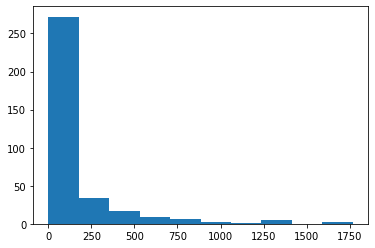

In [154]:
print ('non-passing students:')
non_passing_minutes = sum_grouped_items(non_passing_engagement_by_account,'total_minutes_visited')
describe_data(list(non_passing_minutes.values()))

passing students:
Mean: 394.58604648350865
Standard deviation: 448.4995193265521
Minimum: 0.0
Maximum: 3564.7332644989997


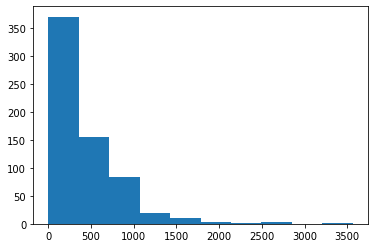

In [155]:
print ('passing students:')
passing_minutes = sum_grouped_items(passing_engagement_by_account,'total_minutes_visited')
describe_data(list(passing_minutes.values()))

## Making Histograms

non-passing students:
Mean: 0.8620689655172413
Standard deviation: 2.5491599418312028
Minimum: 0
Maximum: 27


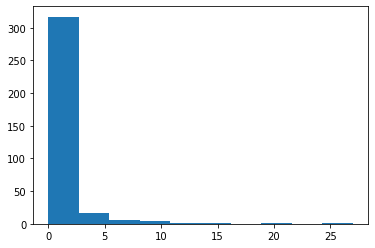

In [158]:
######################################
#                 13                 #
######################################

## Make histograms of the three metrics we looked at earlier for both
## students who passed the subway project and students who didn't. You
## might also want to make histograms of any other metrics you examined.

print ('non-passing students:')
non_passing_lessons = sum_grouped_items(non_passing_engagement_by_account,'lessons_completed')
describe_data(list(non_passing_lessons.values()))

passing students:
Mean: 2.052550231839258
Standard deviation: 3.1422270555779344
Minimum: 0
Maximum: 36


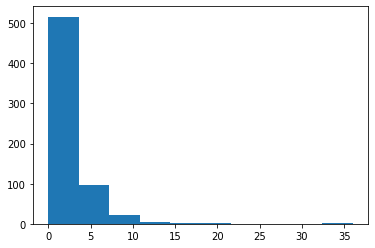

In [159]:
print ('passing students:')
passing_lessons = sum_grouped_items(passing_engagement_by_account,'lessons_completed')
describe_data(list(passing_lessons.values()))

non-passing students:
Mean: 1.9051724137931034
Standard deviation: 1.9057314413619046
Minimum: 0
Maximum: 7


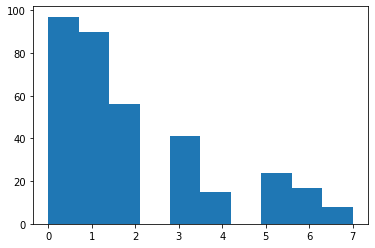

In [161]:
print ('non-passing students:')
non_passing_visits = sum_grouped_items(non_passing_engagement_by_account,'has_visited')
describe_data(list(non_passing_visits.values()))

passing students:
Mean: 3.384853168469861
Standard deviation: 2.2588214709184595
Minimum: 0
Maximum: 7


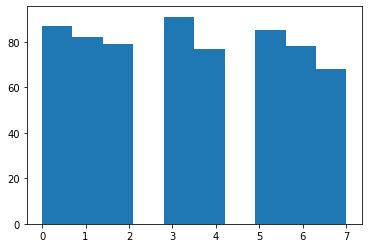

In [162]:
print ('passing students:')
passing_visits = sum_grouped_items(passing_engagement_by_account,'has_visited')
describe_data(list(passing_visits.values()))

## Improving Plots and Sharing Findings

Text(0.5, 1.0, 'janina')

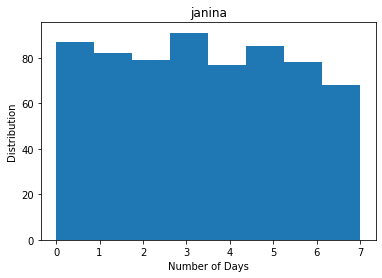

In [166]:
######################################
#                 14                 #
######################################

## Make a more polished version of at least one of your visualizations
## from earlier. Try importing the seaborn library to make the visualization
## look better, adding axis labels and a title, and changing one or more
## arguments to the hist() function.

import seaborn as sns
plt.hist(list(passing_visits.values()), bins = 8)
plt.xlabel('Number of Days')
plt.ylabel('Distribution')
plt.title("janina")